In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(x_train,y_train),(x_test,y_test) =keras.datasets.mnist.load_data() # keras ka dataset hai jo phle se hi train test mein split hua hai

In [3]:
x_train.shape #training data mein 60000 images hain aur hrr image mein 28 X 28 pixels hain ... is lye ye 3*3 matrix ho ga hrr row mein

(60000, 28, 28)

In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train # hrr image ka label hai k us image mein kon sa digit hai

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

# Showing the image

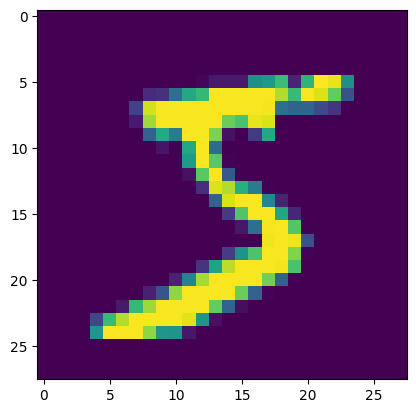

In [8]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

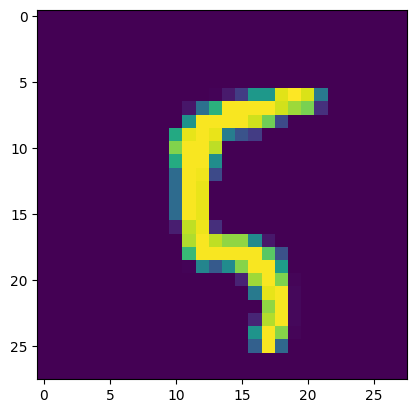

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100])

In [10]:
# hrr image ki pixel value ki range 0-255 hai.... Neural network fast kaam kre is k lye in values ko 0-1 ki range mein lana hai 
# us k lye 255 se divide krein gy .. phrr min = 0/255=0 ho ga aur max = 255/255 = 1 ho ga
x_train = x_train/255
x_test = x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

# Creating Model

In [14]:
model = Sequential()
# hmari hrr image 28X28 ki hain (2D) .... we have to convert it into 1D 
model.add(Flatten(input_shape = (28,28))) # ye higher dimensional data ko lower dimensional mein convert kre ga
model.add(Dense(128,activation = 'relu')) # input nodes btane ki zroort nhi hai kyu k Flatten ka output hi is ka input bne ga
model.add(Dense(10,activation = 'softmax')) # jb bhi output layer mein aik se zada nodes honto softmax hi activation function k tour prr use hoga

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam') #sparse_categorical_crossentropy --> is loss function ki waja se output label 
# ki encoding krne ki zroort nhi thy

In [18]:
model.fit(x_train,y_train,epochs = 10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2853 - val_loss: 0.1567
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1296 - val_loss: 0.1206
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0892 - val_loss: 0.1023
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0661 - val_loss: 0.0998
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0508 - val_loss: 0.0867
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0394 - val_loss: 0.0909
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0307 - val_loss: 0.0840
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0241 - val_loss: 0.0886
Epoch 9/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0195 - val_loss: 0.1017
Epoch 10/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0156 - val_loss: 0.0966


In [20]:
y_prob=model.predict(x_test)
# ye hrr image mein hrr digit ki probability btaye ga ... jis ki probability max ho gy wo hi number us digit ko assign ho ga
model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.33834999e-10, 2.59114583e-12, 7.56029461e-09, ...,
        9.99992132e-01, 8.46169523e-11, 1.45709933e-07],
       [4.92524803e-13, 9.43332807e-08, 9.99999881e-01, ...,
        1.56092417e-15, 3.43049891e-08, 5.34174181e-16],
       [8.66394316e-07, 9.96064842e-01, 2.65191375e-05, ...,
        6.78533252e-05, 3.74865020e-03, 1.42168039e-06],
       ...,
       [2.06660141e-17, 1.93066946e-16, 2.17912088e-18, ...,
        4.02422051e-09, 2.08291943e-11, 1.62420903e-07],
       [5.55089794e-14, 3.90665233e-15, 5.06359102e-16, ...,
        2.07163415e-13, 1.68530660e-05, 7.35476946e-14],
       [1.54561780e-10, 1.15048119e-12, 1.07719514e-10, ...,
        2.31326476e-18, 2.18401477e-10, 6.69487089e-13]],
      shape=(10000, 10), dtype=float32)

In [21]:
y_pred = y_prob.argmax(axis = 1) # ye find kre ga k aik image k kis index prr max probability aye hai aur wo .. number assign krwaye ga

In [22]:
y_prob.argmax(axis = 1)

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.977

# change the architecture

In [25]:
model = Sequential()
# hmari hrr image 28X28 ki hain (2D) .... we have to convert it into 1D 
model.add(Flatten(input_shape = (28,28))) # ye higher dimensional data ko lower dimensional mein convert kre ga
model.add(Dense(128,activation = 'relu'))
model.add(Dense(32,activation = 'relu'))# input nodes btane ki zroort nhi hai kyu k Flatten ka output hi is ka input bne ga
model.add(Dense(10,activation = 'softmax'))

C:\Program Files\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [29]:
history = model.fit(x_train,y_train,epochs = 25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9968 - loss: 0.0102 - val_accuracy: 0.9762 - val_loss: 0.1539
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9976 - loss: 0.0074 - val_accuracy: 0.9747 - val_loss: 0.1637
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9971 - loss: 0.0092 - val_accuracy: 0.9747 - val_loss: 0.1622
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9975 - loss: 0.0071 - val_accuracy: 0.9720 - val_loss: 0.1943
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9976 - loss: 0.0079 - val_accuracy: 0.9751 - val_loss: 0.1955
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9977 - loss: 0.0068 - val_accuracy: 0.9778 - val_loss: 0.1637
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9978 - loss: 0.0061 - val_accuracy: 0.9737 - val_loss: 0.1897
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9979 - loss: 0.0066 -

In [30]:
y_prob=model.predict(x_test)
# ye hrr image mein hrr digit ki probability btaye ga ... jis ki probability max ho gy wo hi number us digit ko assign ho ga


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [31]:
y_pred = y_prob.argmax(axis = 1)

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.976

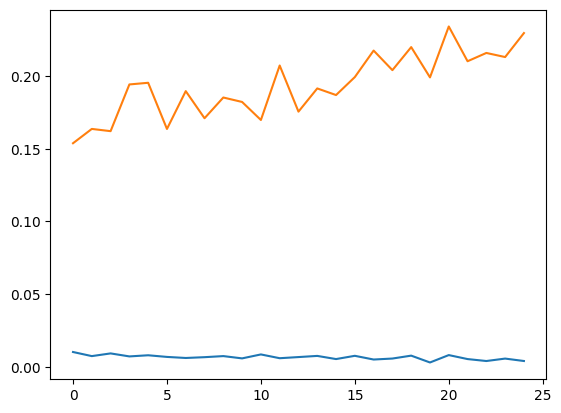

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

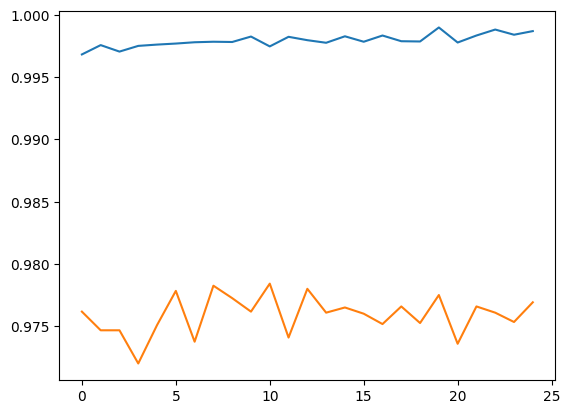

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

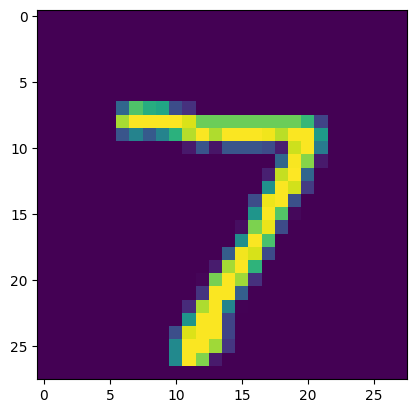

In [35]:
plt.imshow(x_test[0])

In [36]:
model.predict(x_test[0].reshape(1,28,28)).argmax(axis=1) 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


array([7])